# Evaluación de los modelos RAG

## Evaluación de los modelos RAG500 vs RAG1000

In [11]:
import os
import json
import pandas as pd
import re

# Ruta a la carpeta con los resultados de las evaluaciones
comparisons_path = "C:/Users/Daniel/docs/comparisons_gemini"

# Leer todos los archivos JSON
data = []
for filename in os.listdir(comparisons_path):
    if filename.endswith(".json"):
        with open(os.path.join(comparisons_path, filename), "r", encoding="utf-8") as f:
            evaluations = json.load(f)
            data.extend(evaluations)

# Extraer qué respuesta fue mejor según el comentario
def extract_preference(comment):
    match = re.search(r"Which answer is better overall:\s*(A|B|Comparable)", comment)
    return match.group(1) if match else None

# Convertir en DataFrame
df = pd.json_normalize(data)

# Extraer el modelo preferido y añadir columna
df["preferred_answer"] = df["comment"].apply(extract_preference)

# Añadir columna con tipo de comparación
df["comparison_type"] = df["model_comparison"]

# Expandir modelo A
modelA_df = df[["question", "comparison_type", "modelA.name", "modelA.faithfulness", "modelA.relevance",
                "modelA.accuracy", "modelA.completeness_given", "modelA.completeness_overall", "modelA.conciseness", "preferred_answer"]].copy()
modelA_df.columns = ["question", "comparison_type", "model", "faithfulness", "relevance", "accuracy", "completeness_given", "completeness_overall", "conciseness", "preferred_answer"]

# Expandir modelo B
modelB_df = df[["question", "comparison_type", "modelB.name", "modelB.faithfulness", "modelB.relevance",
                "modelB.accuracy", "modelB.completeness_given", "modelB.completeness_overall", "modelB.conciseness", "preferred_answer"]].copy()
modelB_df.columns = ["question", "comparison_type", "model", "faithfulness", "relevance", "accuracy", "completeness_given", "completeness_overall", "conciseness", "preferred_answer"]

# Concatenar ambos
df_long = pd.concat([modelA_df, modelB_df], ignore_index=True)

# Mostrar las primeras filas
print(df_long.head(17))


                                             question        comparison_type  \
0   1. What are the accepted outcome measures spec...   Generative vs RAG500   
1   1. What are the accepted outcome measures spec...  Generative vs RAG1000   
2   1. What are the accepted outcome measures spec...      RAG500 vs RAG1000   
3   2. What is the GRADE methodology and how does ...   Generative vs RAG500   
4   2. What is the GRADE methodology and how does ...  Generative vs RAG1000   
5   2. What is the GRADE methodology and how does ...      RAG500 vs RAG1000   
6   3. Why were conditional recommendations made f...   Generative vs RAG500   
7   3. Why were conditional recommendations made f...  Generative vs RAG1000   
8   3. Why were conditional recommendations made f...      RAG500 vs RAG1000   
9   4. How does the high degree of heterogeneity i...   Generative vs RAG500   
10  4. How does the high degree of heterogeneity i...  Generative vs RAG1000   
11  4. How does the high degree of heter

### Generación de los boxplots de las métricas

C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\57550801.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\57550801.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\57550801.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppDat

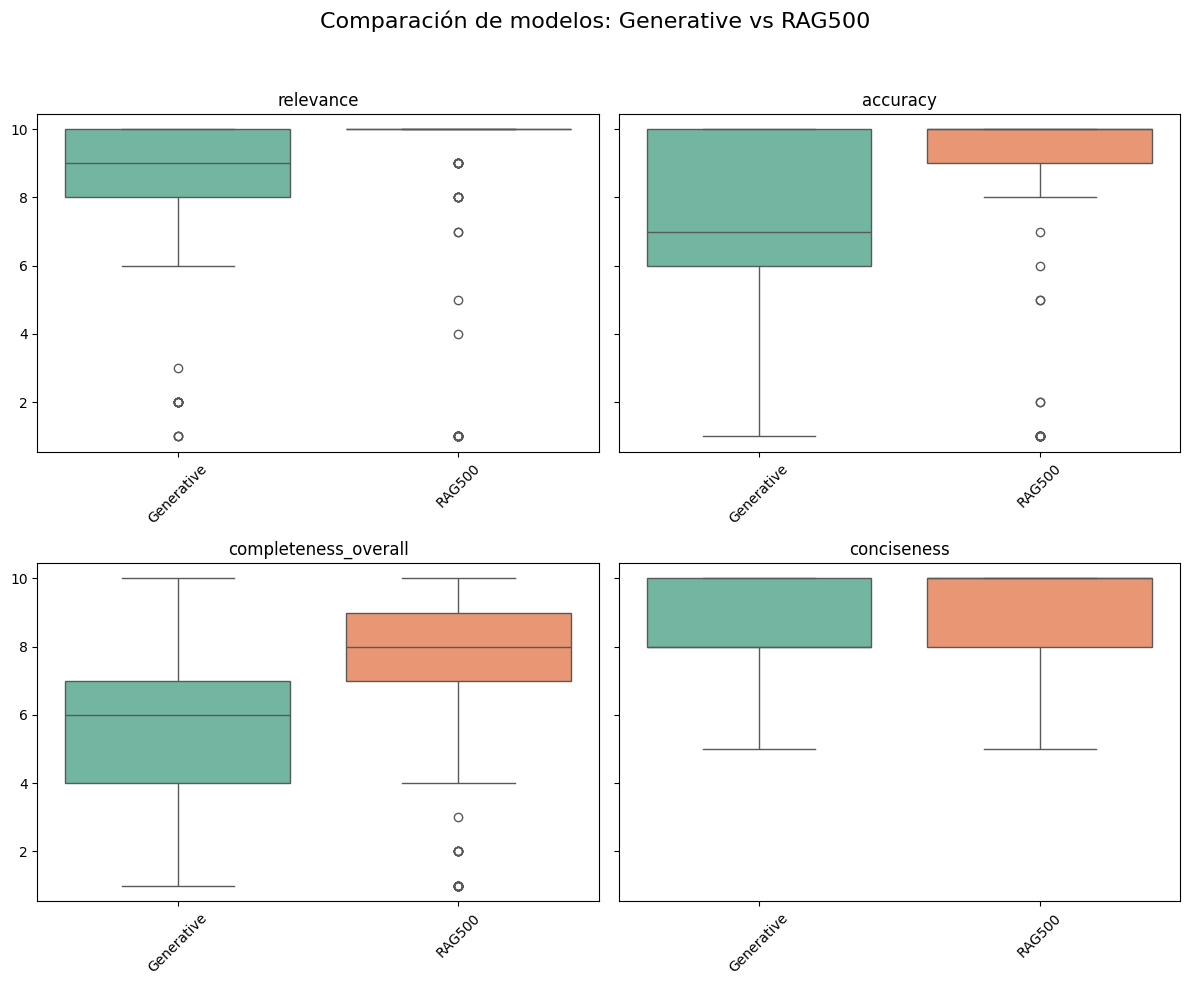

C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\57550801.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\57550801.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\57550801.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppDat

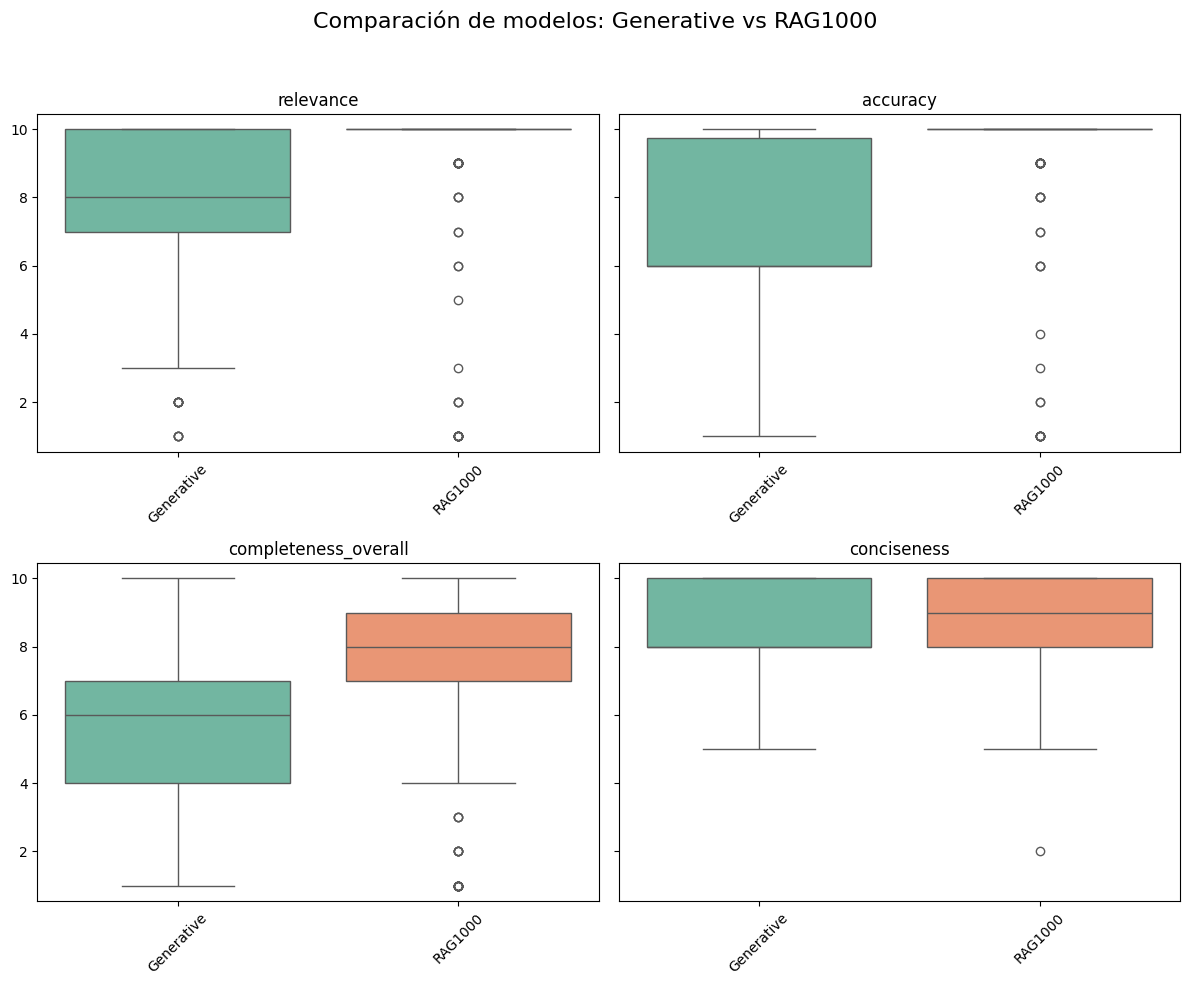

C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\57550801.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\57550801.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\57550801.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppDat

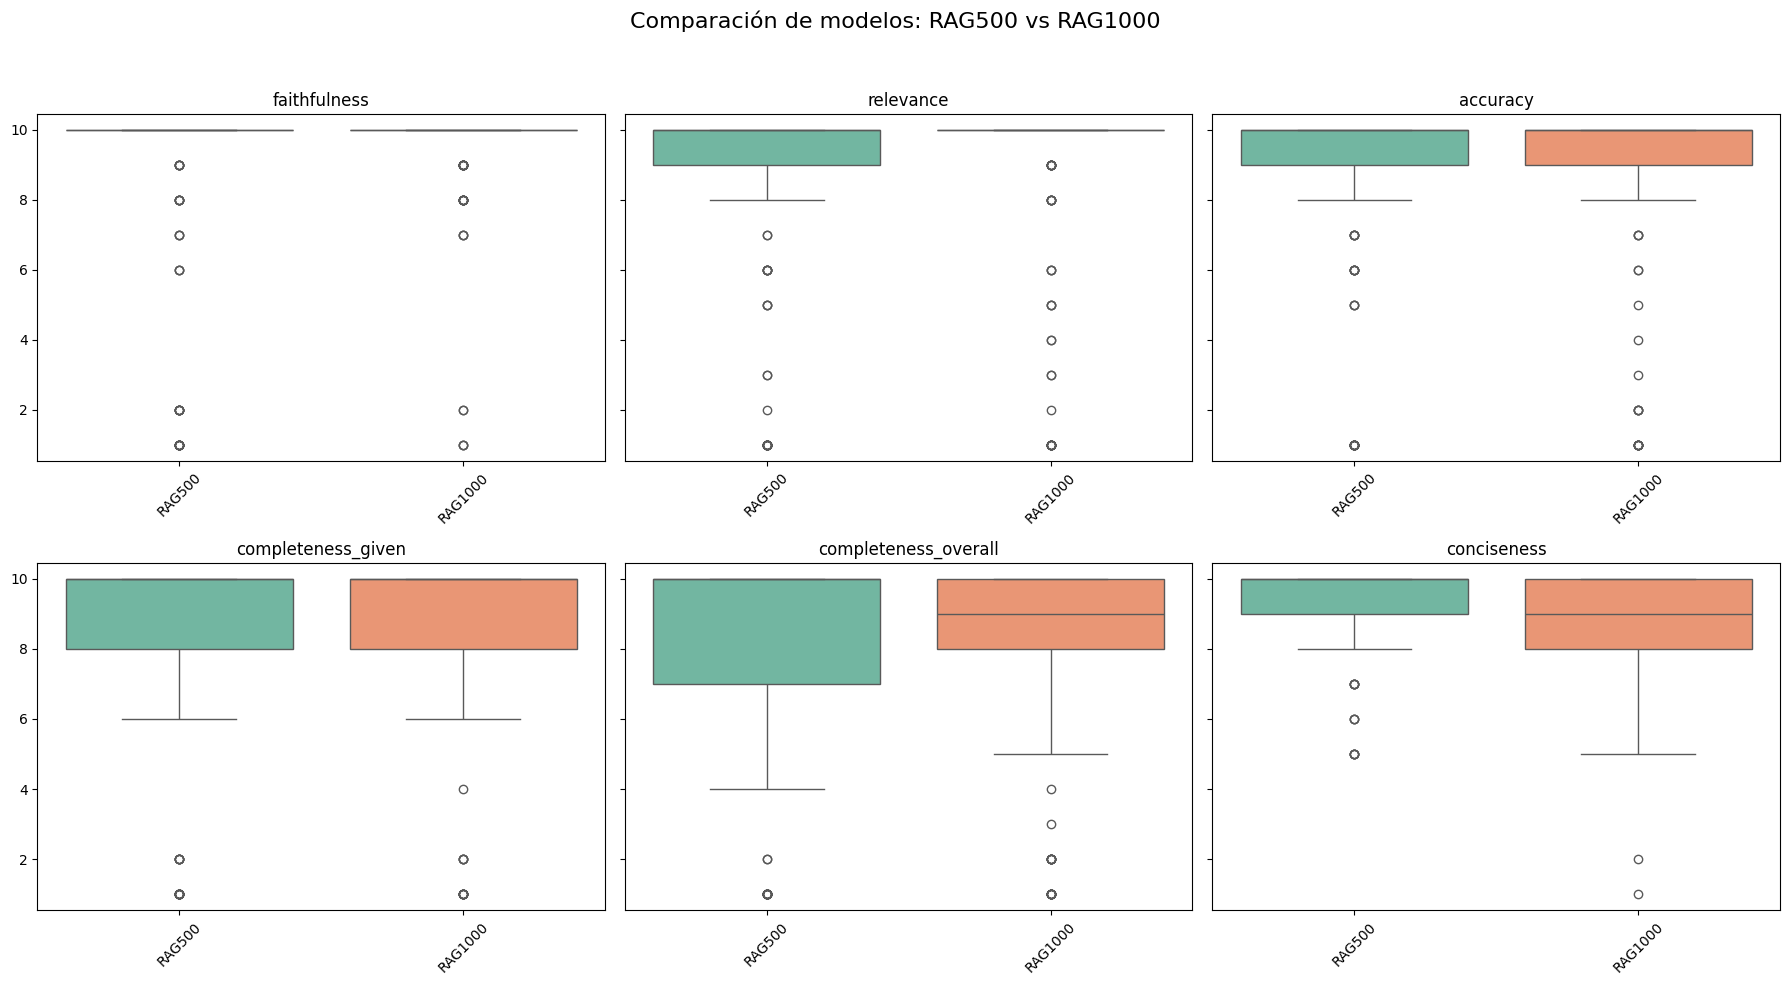

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que las métricas sean numéricas
all_metrics = ["faithfulness", "relevance", "accuracy", "completeness_given", "completeness_overall", "conciseness"]
for col in all_metrics:
    df_long[col] = pd.to_numeric(df_long[col], errors="coerce")

# Obtener las comparaciones únicas
comparisons = df_long["comparison_type"].unique()

# Generar un gráfico por comparación
for comparison in comparisons:
    df_comp = df_long[df_long["comparison_type"] == comparison]

    # Comprobar si "Generative" está en alguno de los modelos de esta comparación
    models_in_comp = df_comp["model"].unique()
    if any("Generative" in m for m in models_in_comp):
        metrics = [m for m in all_metrics if m not in ["faithfulness", "completeness_given"]]
    else:
        metrics = all_metrics

    # Crear figura de subplots en 2 filas
    n_metrics = len(metrics)
    n_rows = 2
    n_cols = (n_metrics + 1) // 2  # Redondea hacia arriba
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows), sharey=True)
    fig.suptitle(f"Comparación de modelos: {comparison}", fontsize=16)

    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
        axes[i].set_title(metric, fontsize=12)
        axes[i].tick_params(axis="x", rotation=45)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")

    # Eliminar subplots vacíos
    for j in range(len(metrics), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



In [13]:
# Crear los archivos separados por tipo de comparación
comparison_types = df_long["comparison_type"].unique()

# Crear una carpeta para los archivos si no existe
output_folder = "metricas_por_comparacion"
os.makedirs(output_folder, exist_ok=True)

for comparison in comparison_types:
    comparison_df = df_long[df_long["comparison_type"] == comparison]

    # Agrupar y calcular estadísticas
    summary = {}
    for metric in metrics:
        stats = comparison_df.groupby("model")[metric].agg(["mean", "std"]).round(3)
        summary[metric] = stats.apply(lambda row: f"{row['mean']} ± {row['std']}", axis=1)

    # Convertir a DataFrame final (métricas como filas, modelos como columnas)
    result = pd.DataFrame(summary).T  # Transponer para que las métricas sean filas

    # Guardar a Excel
    output_path = os.path.join(output_folder, f"{comparison}.xlsx")
    result.to_excel(output_path)

    print(f"Archivo guardado: {output_path}")



Archivo guardado: metricas_por_comparacion\Generative vs RAG500.xlsx
Archivo guardado: metricas_por_comparacion\Generative vs RAG1000.xlsx
Archivo guardado: metricas_por_comparacion\RAG500 vs RAG1000.xlsx


### Elección de modelos: respuestas escogidas

preferred_answer          A      B  Comparable
comparison_type                               
Generative vs RAG1000  32.0  138.0         0.0
Generative vs RAG500   40.0  130.0         0.0
RAG500 vs RAG1000      87.0   62.0        19.0


<Figure size 1000x600 with 0 Axes>

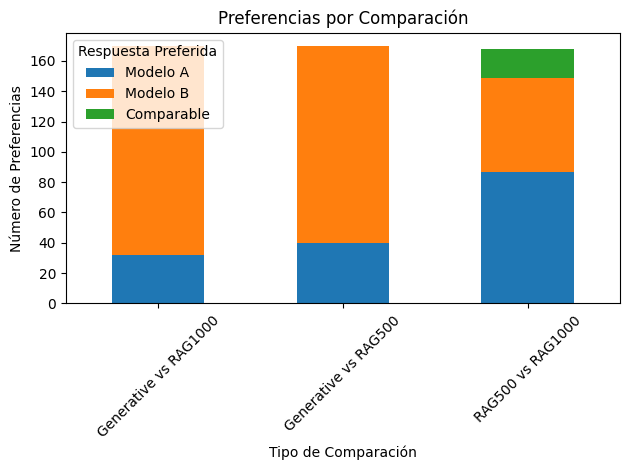

model                  Generative  RAG1000  RAG500
comparison_type                                   
Generative vs RAG1000        85.0     85.0     0.0
Generative vs RAG500         85.0      0.0    85.0
RAG500 vs RAG1000             0.0     85.0    85.0


In [14]:
import matplotlib.pyplot as plt

# Contar cuántas veces se prefiere cada respuesta en cada tipo de comparación
# Dividir entre 2 para corregir la duplicación
preference_counts = df_long.groupby(['comparison_type', 'preferred_answer']).size().unstack(fill_value=0) / 2

# Imprimir las frecuencias de las preferencias por comparación
print(preference_counts)

# Crear el histograma de las comparaciones (por tipo de comparación)
plt.figure(figsize=(10, 6))
preference_counts.plot(kind='bar', stacked=True)
plt.title('Preferencias por Comparación')
plt.xlabel('Tipo de Comparación')
plt.ylabel('Número de Preferencias')
plt.xticks(rotation=45)
plt.legend(title='Respuesta Preferida', loc='upper left', labels=['Modelo A', 'Modelo B', 'Comparable'])
plt.tight_layout()
plt.show()

# Contar cuántas veces ha sido preferido cada modelo
# Dividir entre 2 para corregir la duplicación
model_preference_counts = df_long.groupby(['comparison_type', 'model']).size().unstack(fill_value=0) / 2

# Imprimir cuántas veces se ha preferido cada modelo
print(model_preference_counts)

In [15]:
from scipy.stats import binomtest
import pandas as pd

# Obtener los tipos de comparación únicos
comparison_types = df_long['comparison_type'].unique()

# Lista para almacenar resultados
binomial_results = []

# Iterar sobre cada tipo de comparación
for comp_type in comparison_types:
    # Filtrar solo A vs B para esta comparación
    ab_only = df_long[
        (df_long['comparison_type'] == comp_type) &
        (df_long['preferred_answer'].isin(['A', 'B']))
    ]

    # Contar número de veces que se prefirió A
    count_A = (ab_only['preferred_answer'] == 'A').sum() // 2
    n = len(ab_only) // 2

    # Realizar test binomial solo si hay datos suficientes
    if n > 0:
        test = binomtest(count_A, n=n, p=0.5)
        binomial_results.append({
            'Comparación': comp_type,
            'Preferencias A': count_A,
            'Preferencias B': n - count_A,
            'Total (A+B)': n,
            'p-valor': test.pvalue
        })

# Crear DataFrame con los resultados
binomial_df = pd.DataFrame(binomial_results)
print(binomial_df)
# Guardar en CSV con codificación UTF-8
binomial_df["p-valor"] = binomial_df["p-valor"].apply(lambda x: f"{x:.4e}")

# Crear el directorio si no existe
output_folder = "results"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)

# Exportar a CSV
csv_path = os.path.join(output_folder, "binomial.csv")
binomial_df.to_csv(csv_path, index=False)

# Exportar a XLSX
xlsx_path = os.path.join(output_folder, "binomial.xlsx")
binomial_df.to_excel(xlsx_path, index=False)


             Comparación  Preferencias A  Preferencias B  Total (A+B)  \
0   Generative vs RAG500              40             130          170   
1  Generative vs RAG1000              32             138          170   
2      RAG500 vs RAG1000              87              62          149   

        p-valor  
0  2.630348e-12  
1  6.898772e-17  
2  4.891516e-02  


### Comparación de las métricas. Wilcoxon test

In [16]:
import json
import pandas as pd
from scipy.stats import wilcoxon
from collections import defaultdict
import os

# Cargar los archivos JSON desde una carpeta
def load_all_comparisons(folder_path):
    data = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".json"):
            with open(os.path.join(folder_path, file_name), 'r', encoding='utf-8') as f:
                data.extend(json.load(f))
    return data

# Preprocesar y organizar los datos por comparación
def prepare_comparisons(data):
    comparisons = defaultdict(list)
    for entry in data:
        modelA = entry["modelA"]
        modelB = entry["modelB"]
        key = f'{modelA["name"]} vs {modelB["name"]}'
        metrics = ["faithfulness", "relevance", "accuracy", "completeness_given", "completeness_overall", "conciseness"]
        comparisons[key].append({
            metric: (modelA.get(metric), modelB.get(metric)) for metric in metrics
        })
    return comparisons

# Función segura para convertir valores a float
def safe_float(val):
    try:
        return float(val)
    except (TypeError, ValueError):
        return None

# Realizar test de Wilcoxon para cada comparación y métrica
def run_wilcoxon_tests(comparisons):
    results = []
    for comparison_name, data in comparisons.items():
        df = pd.DataFrame(data)
        for metric in df.columns:
            A_vals = df[metric].apply(lambda x: safe_float(x[0]))
            B_vals = df[metric].apply(lambda x: safe_float(x[1]))
            mask = pd.notnull(A_vals) & pd.notnull(B_vals)
            if mask.sum() > 1:
                try:
                    stat, p_value = wilcoxon(A_vals[mask], B_vals[mask])
                    results.append({
                        "comparación": comparison_name,
                        "métrica": metric,
                        "wilcoxon_stat": stat,
                        "p_valor": p_value,
                        "media_A": A_vals[mask].mean(),
                        "media_B": B_vals[mask].mean(),
                        "n": mask.sum()
                    })
                except ValueError as e:
                    # Esto ocurre si todos los pares son iguales (wilcoxon no puede correr en ese caso)
                    results.append({
                        "comparación": comparison_name,
                        "métrica": metric,
                        "wilcoxon_stat": None,
                        "p_valor": None,
                        "media_A": A_vals[mask].mean(),
                        "media_B": B_vals[mask].mean(),
                        "n": mask.sum(),
                        "error": str(e)
                    })
    return pd.DataFrame(results)

# Cargar los datos y preparar las comparaciones
folder_path = "C:/Users/Daniel/docs/comparisons_gemini"
data = load_all_comparisons(folder_path)
comparisons = prepare_comparisons(data)
wilcoxon_results_df = run_wilcoxon_tests(comparisons)

# Mostrar los resultados significativos (p < 0.05)

print(wilcoxon_results_df[wilcoxon_results_df["p_valor"] < 0.05])
print(wilcoxon_results_df)

# Crear el directorio si no existe
output_folder = "results"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)

# Exportar a CSV
csv_path = os.path.join(output_folder, "wilcoxon_test.csv")
wilcoxon_results_df.to_csv(csv_path, index=False)

# Exportar a XLSX
xlsx_path = os.path.join(output_folder, "wilcoxon_test.xlsx")
wilcoxon_results_df.to_excel(xlsx_path, index=False)

print(f"Resultados guardados en:\n{csv_path}\n{xlsx_path}")

              comparación               métrica  wilcoxon_stat       p_valor  \
0    Generative vs RAG500             relevance         2162.0  3.226907e-02   
1    Generative vs RAG500              accuracy         2356.5  8.571414e-07   
2    Generative vs RAG500  completeness_overall         2820.0  8.774604e-08   
3    Generative vs RAG500           conciseness         2078.5  4.253660e-07   
4   Generative vs RAG1000             relevance         1734.5  7.454786e-05   
5   Generative vs RAG1000              accuracy         1282.0  8.419243e-13   
6   Generative vs RAG1000  completeness_overall         1840.0  7.777593e-14   
8       RAG500 vs RAG1000          faithfulness          499.0  3.408329e-03   
13      RAG500 vs RAG1000           conciseness         1864.5  2.544301e-06   

     media_A   media_B    n  
0   8.358824  8.664706  170  
1   6.694118  8.600000  170  
2   5.470588  7.217647  170  
3   8.376471  9.164706  170  
4   8.129412  8.935294  170  
5   6.429412  9.105

## Evaluación del efecto de GPT-4o-mini

In [17]:
import os
import json
import pandas as pd
import re

# Ruta a la carpeta con los resultados de las evaluaciones
comparisons_path = "C:/Users/Daniel/docs/comparisons_gemini2"

# Leer todos los archivos JSON
data = []
for filename in os.listdir(comparisons_path):
    if filename.endswith(".json"):
        with open(os.path.join(comparisons_path, filename), "r", encoding="utf-8") as f:
            evaluations = json.load(f)
            data.extend(evaluations)

# Extraer qué respuesta fue mejor según el comentario
def extract_preference(comment):
    match = re.search(r"Which answer is better overall:\s*(A|B|Comparable)", comment)
    return match.group(1) if match else None

# Convertir en DataFrame
df = pd.json_normalize(data)

# Extraer el modelo preferido y añadir columna
df["preferred_answer"] = df["comment"].apply(extract_preference)

# Añadir columna con tipo de comparación
df["comparison_type"] = df["model_comparison"]

# Expandir modelo A
modelA_df = df[["question", "comparison_type", "modelA.name", "modelA.faithfulness", "modelA.relevance",
                "modelA.accuracy", "modelA.completeness_given", "modelA.completeness_overall", "modelA.conciseness", "preferred_answer"]].copy()
modelA_df.columns = ["question", "comparison_type", "model", "faithfulness", "relevance", "accuracy", "completeness_given", "completeness_overall", "conciseness", "preferred_answer"]

# Expandir modelo B
modelB_df = df[["question", "comparison_type", "modelB.name", "modelB.faithfulness", "modelB.relevance",
                "modelB.accuracy", "modelB.completeness_given", "modelB.completeness_overall", "modelB.conciseness", "preferred_answer"]].copy()
modelB_df.columns = ["question", "comparison_type", "model", "faithfulness", "relevance", "accuracy", "completeness_given", "completeness_overall", "conciseness", "preferred_answer"]

# Concatenar ambos
df_long = pd.concat([modelA_df, modelB_df], ignore_index=True)

# Mostrar las primeras filas
print(df_long.head(17))


                                             question        comparison_type  \
0   1. What are the accepted outcome measures spec...   Generative vs RAG500   
1   1. What are the accepted outcome measures spec...  Generative vs RAG1000   
2   1. What are the accepted outcome measures spec...      RAG500 vs RAG1000   
3   2. What is the GRADE methodology and how does ...   Generative vs RAG500   
4   2. What is the GRADE methodology and how does ...  Generative vs RAG1000   
5   2. What is the GRADE methodology and how does ...      RAG500 vs RAG1000   
6   3. Why were conditional recommendations made f...   Generative vs RAG500   
7   3. Why were conditional recommendations made f...  Generative vs RAG1000   
8   3. Why were conditional recommendations made f...      RAG500 vs RAG1000   
9   4. How does the high degree of heterogeneity i...   Generative vs RAG500   
10  4. How does the high degree of heterogeneity i...  Generative vs RAG1000   
11  4. How does the high degree of heter

### Generación de los boxplots de las métricas

C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\2512070464.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\2512070464.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\2512070464.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\

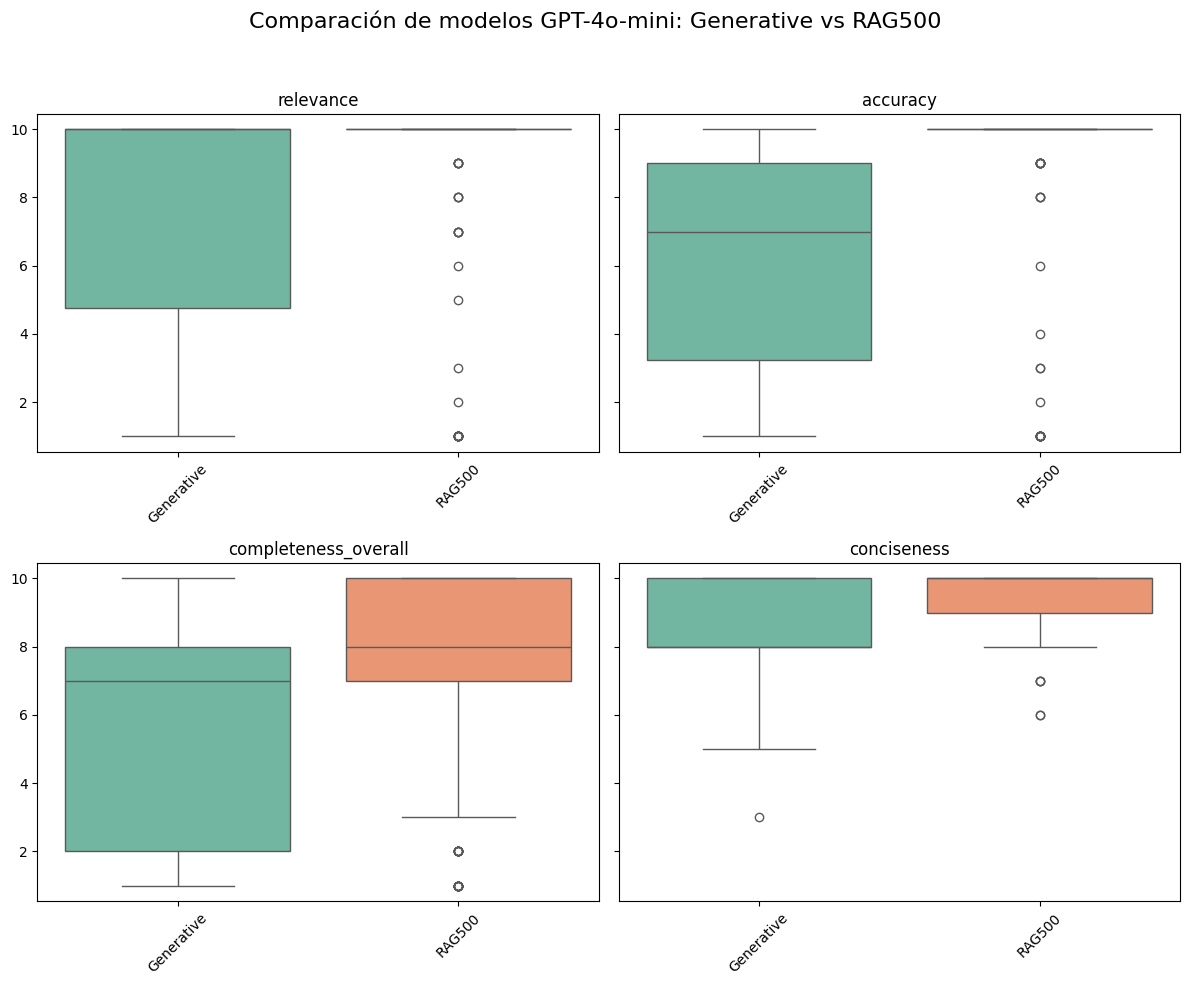

C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\2512070464.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\2512070464.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\2512070464.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\

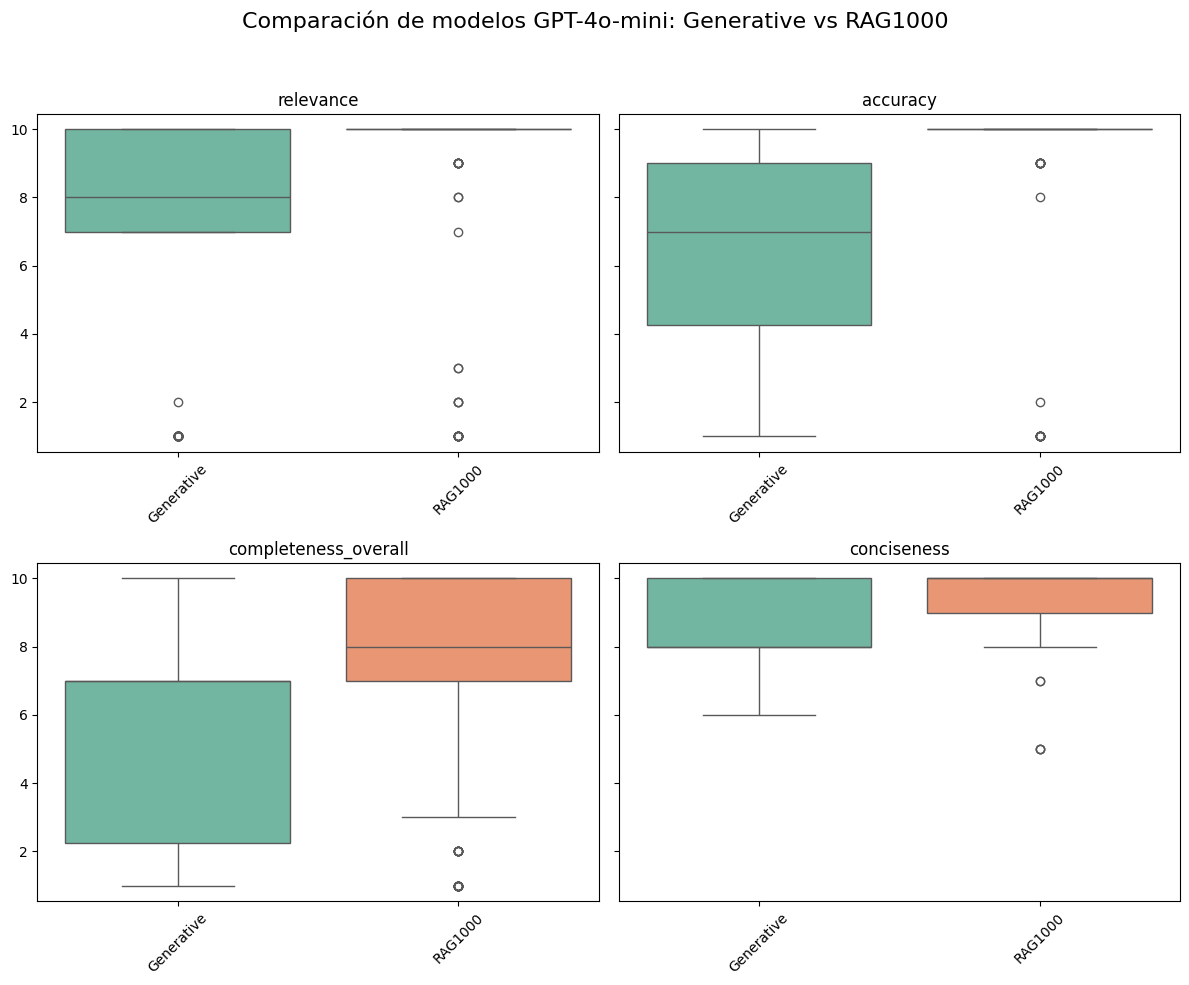

C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\2512070464.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\2512070464.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\2512070464.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\

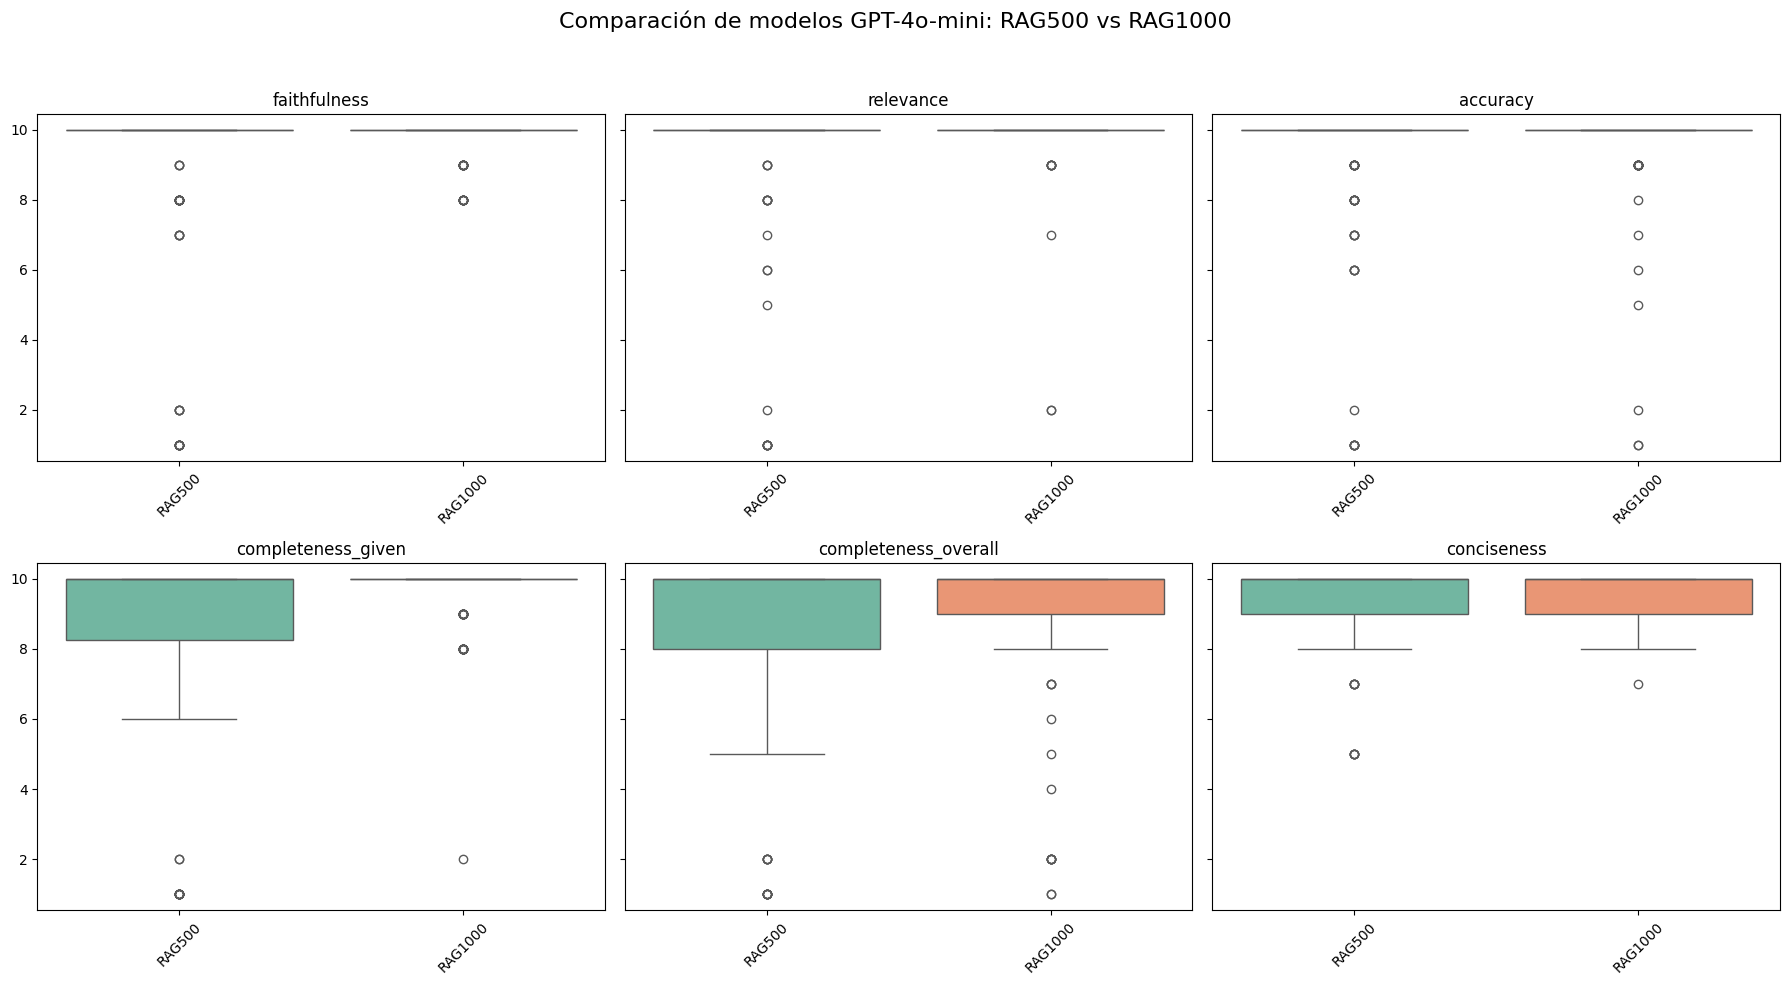

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que las métricas sean numéricas
all_metrics = ["faithfulness", "relevance", "accuracy", "completeness_given", "completeness_overall", "conciseness"]
for col in all_metrics:
    df_long[col] = pd.to_numeric(df_long[col], errors="coerce")

# Obtener las comparaciones únicas
comparisons = df_long["comparison_type"].unique()

# Generar un gráfico por comparación
for comparison in comparisons:
    df_comp = df_long[df_long["comparison_type"] == comparison]

    # Comprobar si "Generative" está en alguno de los modelos de esta comparación
    models_in_comp = df_comp["model"].unique()
    if any("Generative" in m for m in models_in_comp):
        metrics = [m for m in all_metrics if m not in ["faithfulness", "completeness_given"]]
    else:
        metrics = all_metrics

    # Crear figura de subplots en 2 filas
    n_metrics = len(metrics)
    n_rows = 2
    n_cols = (n_metrics + 1) // 2  # Redondea hacia arriba
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows), sharey=True)
    fig.suptitle(f"Comparación de modelos GPT-4o-mini: {comparison}", fontsize=16)

    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
        axes[i].set_title(metric, fontsize=12)
        axes[i].tick_params(axis="x", rotation=45)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")

    # Eliminar subplots vacíos
    for j in range(len(metrics), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [19]:
# Crear los archivos separados por tipo de comparación
comparison_types = df_long["comparison_type"].unique()

# Crear una carpeta para los archivos si no existe
output_folder = "metricas_por_comparacionGPT4o-mini"
os.makedirs(output_folder, exist_ok=True)

for comparison in comparison_types:
    comparison_df = df_long[df_long["comparison_type"] == comparison]

    # Agrupar y calcular estadísticas
    summary = {}
    for metric in metrics:
        stats = comparison_df.groupby("model")[metric].agg(["mean", "std"]).round(3)
        summary[metric] = stats.apply(lambda row: f"{row['mean']} ± {row['std']}", axis=1)

    # Convertir a DataFrame final (métricas como filas, modelos como columnas)
    result = pd.DataFrame(summary).T  # Transponer para que las métricas sean filas

    # Guardar a Excel
    output_path = os.path.join(output_folder, f"{comparison}.xlsx")
    result.to_excel(output_path)

    print(f"Archivo guardado: {output_path}")


Archivo guardado: metricas_por_comparacionGPT4o-mini\Generative vs RAG500.xlsx
Archivo guardado: metricas_por_comparacionGPT4o-mini\Generative vs RAG1000.xlsx
Archivo guardado: metricas_por_comparacionGPT4o-mini\RAG500 vs RAG1000.xlsx


### Elección de modelos: respuestas escogidas

preferred_answer          A      B  Comparable
comparison_type                               
Generative vs RAG1000  31.0  139.0         0.0
Generative vs RAG500   34.0  136.0         0.0
RAG500 vs RAG1000      67.0   55.0        48.0


<Figure size 1000x600 with 0 Axes>

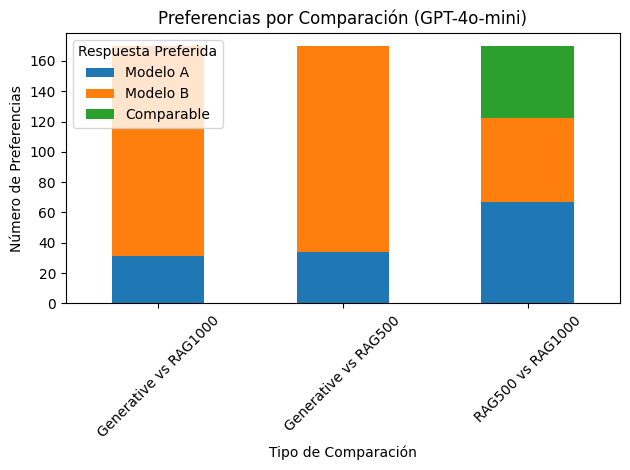

model                  Generative  RAG1000  RAG500
comparison_type                                   
Generative vs RAG1000        85.0     85.0     0.0
Generative vs RAG500         85.0      0.0    85.0
RAG500 vs RAG1000             0.0     85.0    85.0


In [20]:
import matplotlib.pyplot as plt

# Contar cuántas veces se prefiere cada respuesta en cada tipo de comparación
# Dividir entre 2 para corregir la duplicación
preference_counts = df_long.groupby(['comparison_type', 'preferred_answer']).size().unstack(fill_value=0) / 2

# Imprimir las frecuencias de las preferencias por comparación
print(preference_counts)

# Crear el histograma de las comparaciones (por tipo de comparación)
plt.figure(figsize=(10, 6))
preference_counts.plot(kind='bar', stacked=True)
plt.title('Preferencias por Comparación (GPT-4o-mini)')
plt.xlabel('Tipo de Comparación')
plt.ylabel('Número de Preferencias')
plt.xticks(rotation=45)
plt.legend(title='Respuesta Preferida', loc='upper left', labels=['Modelo A', 'Modelo B', 'Comparable'])
plt.tight_layout()
plt.show()

# Contar cuántas veces ha sido preferido cada modelo
# Dividir entre 2 para corregir la duplicación
model_preference_counts = df_long.groupby(['comparison_type', 'model']).size().unstack(fill_value=0) / 2

# Imprimir cuántas veces se ha preferido cada modelo
print(model_preference_counts)

In [21]:
from scipy.stats import binomtest
import pandas as pd

# Obtener los tipos de comparación únicos
comparison_types = df_long['comparison_type'].unique()

# Lista para almacenar resultados
binomial_results = []

# Iterar sobre cada tipo de comparación
for comp_type in comparison_types:
    # Filtrar solo A vs B para esta comparación
    ab_only = df_long[
        (df_long['comparison_type'] == comp_type) &
        (df_long['preferred_answer'].isin(['A', 'B']))
    ]

    # Contar número de veces que se prefirió A
    count_A = (ab_only['preferred_answer'] == 'A').sum() // 2
    n = len(ab_only) // 2

    # Realizar test binomial solo si hay datos suficientes
    if n > 0:
        test = binomtest(count_A, n=n, p=0.5)
        binomial_results.append({
            'Comparación': comp_type,
            'Preferencias A': count_A,
            'Preferencias B': n - count_A,
            'Total (A+B)': n,
            'p-valor': test.pvalue
        })

# Crear DataFrame con los resultados
binomial_df = pd.DataFrame(binomial_results)
print(binomial_df)
# Guardar en CSV con codificación UTF-8
binomial_df["p-valor"] = binomial_df["p-valor"].apply(lambda x: f"{x:.4e}")

# Crear el directorio si no existe
output_folder = "results"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)

# Exportar a CSV
csv_path = os.path.join(output_folder, "binomial_gpt4.csv")
binomial_df.to_csv(csv_path, index=False)

# Exportar a XLSX
xlsx_path = os.path.join(output_folder, "binomial_gpt4.xlsx")
binomial_df.to_excel(xlsx_path, index=False)


             Comparación  Preferencias A  Preferencias B  Total (A+B)  \
0   Generative vs RAG500              34             136          170   
1  Generative vs RAG1000              31             139          170   
2      RAG500 vs RAG1000              67              55          122   

        p-valor  
0  1.189602e-15  
1  1.570654e-17  
2  3.193083e-01  


### Comparación de las métricas. Wilcoxon test

In [22]:
# USO
folder_path = "C:/Users/Daniel/docs/comparisons_gemini2"
data = load_all_comparisons(folder_path)
comparisons = prepare_comparisons(data)
wilcoxon_results_df = run_wilcoxon_tests(comparisons)

# Mostrar los resultados significativos (p < 0.05)

print(wilcoxon_results_df[wilcoxon_results_df["p_valor"] < 0.05])
print(wilcoxon_results_df)

# Crear el directorio si no existe
output_folder = "results"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)

# Exportar a CSV
csv_path = os.path.join(output_folder, "wilcoxon_test_GPT4.csv")
wilcoxon_results_df.to_csv(csv_path, index=False)

# Exportar a XLSX
xlsx_path = os.path.join(output_folder, "wilcoxon_test_GPT4.xlsx")
wilcoxon_results_df.to_excel(xlsx_path, index=False)

print(f"Resultados guardados en:\n{csv_path}\n{xlsx_path}")

              comparación               métrica  wilcoxon_stat       p_valor  \
0    Generative vs RAG500             relevance          921.5  1.914734e-05   
1    Generative vs RAG500              accuracy         1497.5  6.609887e-13   
2    Generative vs RAG500  completeness_overall         3479.5  6.037340e-07   
3    Generative vs RAG500           conciseness          743.0  1.156432e-11   
4   Generative vs RAG1000             relevance         1117.5  3.396147e-07   
5   Generative vs RAG1000              accuracy         1063.5  3.980144e-15   
6   Generative vs RAG1000  completeness_overall         2874.5  1.220130e-08   
7   Generative vs RAG1000           conciseness         1382.5  1.074354e-08   
8       RAG500 vs RAG1000          faithfulness          317.5  6.235716e-04   
9       RAG500 vs RAG1000             relevance           51.5  2.623974e-03   
10      RAG500 vs RAG1000              accuracy          306.0  9.182771e-03   
11      RAG500 vs RAG1000    completenes

## Evaluación del efecto de incrementar n=340

In [23]:
import os
import json
import pandas as pd
import re

# Ruta a la carpeta con los resultados de las evaluaciones
comparisons_path = "C:/Users/Daniel/docs/comparisons_gemini20"

# Leer todos los archivos JSON
data = []
for filename in os.listdir(comparisons_path):
    if filename.endswith(".json"):
        with open(os.path.join(comparisons_path, filename), "r", encoding="utf-8") as f:
            evaluations = json.load(f)
            data.extend(evaluations)

# Extraer qué respuesta fue mejor según el comentario
def extract_preference(comment):
    match = re.search(r"Which answer is better overall:\s*(A|B|Comparable)", comment)
    return match.group(1) if match else None

# Convertir en DataFrame
df = pd.json_normalize(data)

# Extraer el modelo preferido y añadir columna
df["preferred_answer"] = df["comment"].apply(extract_preference)

# Añadir columna con tipo de comparación
df["comparison_type"] = df["model_comparison"]

# Expandir modelo A
modelA_df = df[["question", "comparison_type", "modelA.name", "modelA.faithfulness", "modelA.relevance",
                "modelA.accuracy", "modelA.completeness_given", "modelA.completeness_overall", "modelA.conciseness", "preferred_answer"]].copy()
modelA_df.columns = ["question", "comparison_type", "model", "faithfulness", "relevance", "accuracy", "completeness_given", "completeness_overall", "conciseness", "preferred_answer"]

# Expandir modelo B
modelB_df = df[["question", "comparison_type", "modelB.name", "modelB.faithfulness", "modelB.relevance",
                "modelB.accuracy", "modelB.completeness_given", "modelB.completeness_overall", "modelB.conciseness", "preferred_answer"]].copy()
modelB_df.columns = ["question", "comparison_type", "model", "faithfulness", "relevance", "accuracy", "completeness_given", "completeness_overall", "conciseness", "preferred_answer"]

# Concatenar ambos
df_long = pd.concat([modelA_df, modelB_df], ignore_index=True)

# Mostrar las primeras filas
print(df_long.head(17))


                                             question        comparison_type  \
0   1. What poor prognostic factors indicate sever...   Generative vs RAG500   
1   1. What poor prognostic factors indicate sever...  Generative vs RAG1000   
2   1. What poor prognostic factors indicate sever...      RAG500 vs RAG1000   
3   2. How should treatment decisions be approache...   Generative vs RAG500   
4   2. How should treatment decisions be approache...  Generative vs RAG1000   
5   2. How should treatment decisions be approache...      RAG500 vs RAG1000   
6   3. How does long-term damage, such as joint de...   Generative vs RAG500   
7   3. How does long-term damage, such as joint de...  Generative vs RAG1000   
8   3. How does long-term damage, such as joint de...      RAG500 vs RAG1000   
9   4. What are the poor prognostic factors that h...   Generative vs RAG500   
10  4. What are the poor prognostic factors that h...  Generative vs RAG1000   
11  4. What are the poor prognostic fact

### Generación de los boxplots de las métricas

C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\3247235966.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\3247235966.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\3247235966.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\

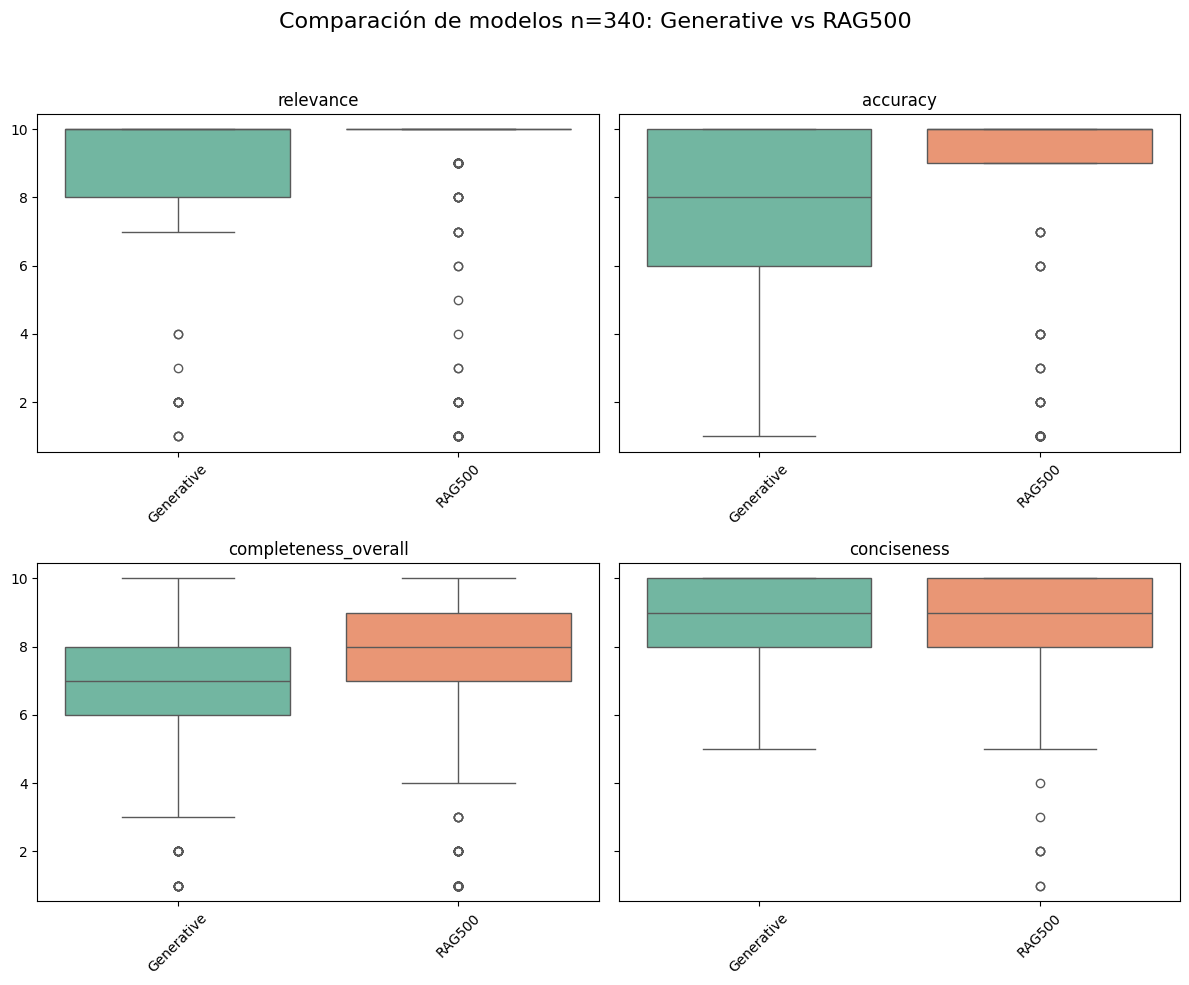

C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\3247235966.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\3247235966.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\3247235966.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\

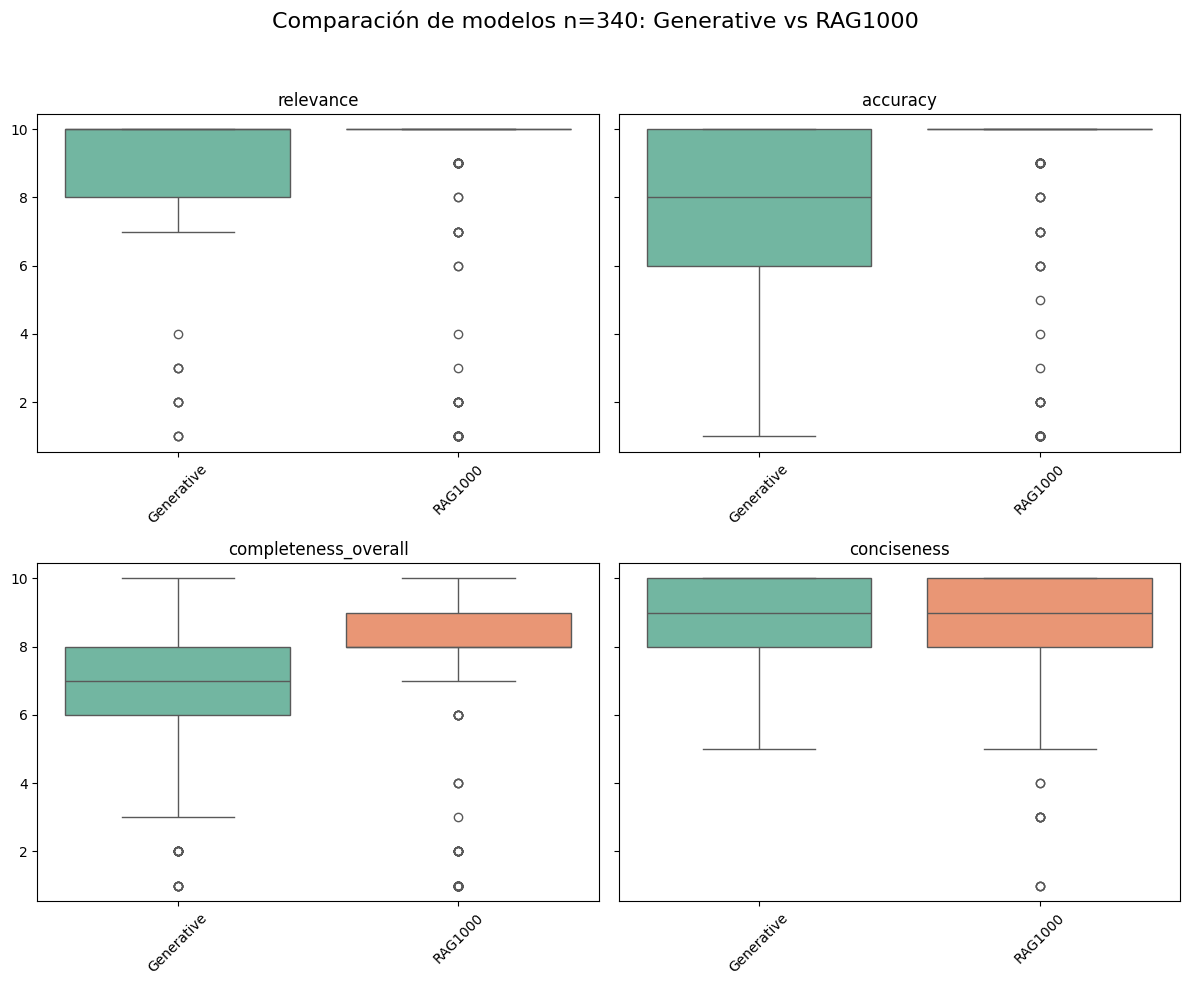

C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\3247235966.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\3247235966.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4252\3247235966.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
C:\Users\Daniel\

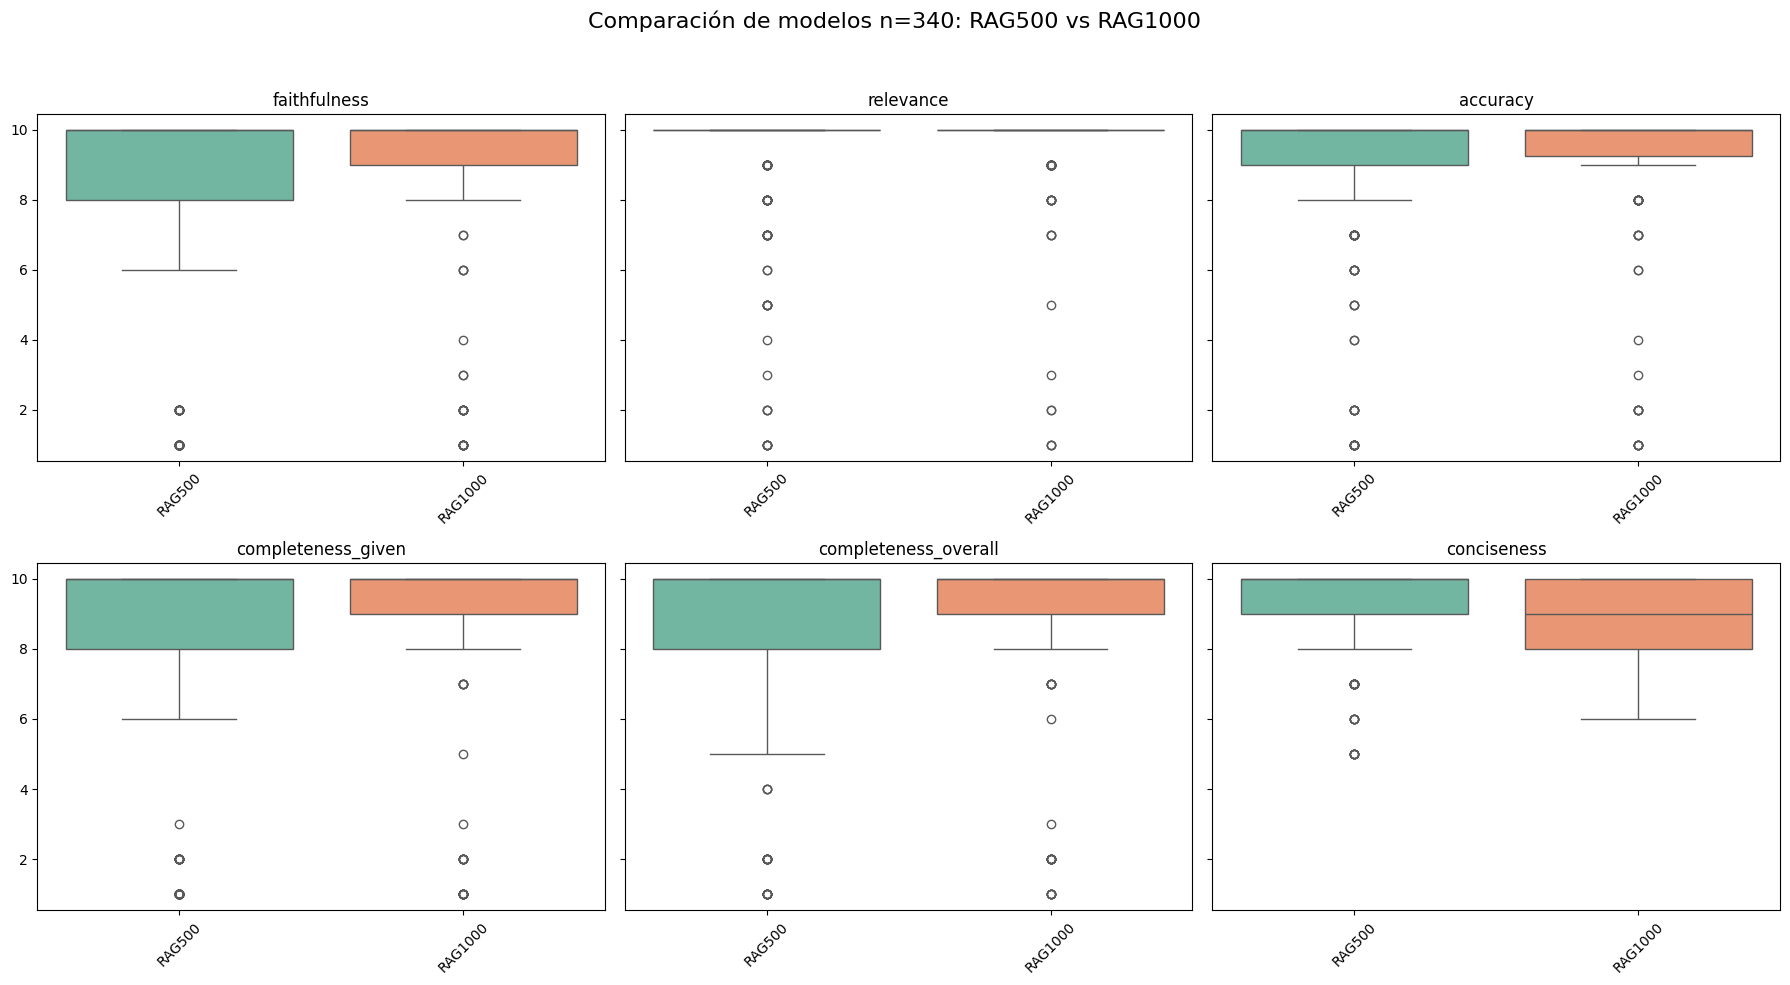

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que las métricas sean numéricas
all_metrics = ["faithfulness", "relevance", "accuracy", "completeness_given", "completeness_overall", "conciseness"]
for col in all_metrics:
    df_long[col] = pd.to_numeric(df_long[col], errors="coerce")

# Obtener las comparaciones únicas
comparisons = df_long["comparison_type"].unique()

# Generar un gráfico por comparación
for comparison in comparisons:
    df_comp = df_long[df_long["comparison_type"] == comparison]

    # Comprobar si "Generative" está en alguno de los modelos de esta comparación
    models_in_comp = df_comp["model"].unique()
    if any("Generative" in m for m in models_in_comp):
        metrics = [m for m in all_metrics if m not in ["faithfulness", "completeness_given"]]
    else:
        metrics = all_metrics

    # Crear figura de subplots en 2 filas
    n_metrics = len(metrics)
    n_rows = 2
    n_cols = (n_metrics + 1) // 2  # Redondea hacia arriba
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows), sharey=True)
    fig.suptitle(f"Comparación de modelos n=340: {comparison}", fontsize=16)

    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        sns.boxplot(data=df_comp, x="model", y=metric, ax=axes[i], palette="Set2")
        axes[i].set_title(metric, fontsize=12)
        axes[i].tick_params(axis="x", rotation=45)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")

    # Eliminar subplots vacíos
    for j in range(len(metrics), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [25]:
# Crear los archivos separados por tipo de comparación
comparison_types = df_long["comparison_type"].unique()

# Crear una carpeta para los archivos si no existe
output_folder = "metricas_por_comparacion_340"
os.makedirs(output_folder, exist_ok=True)

for comparison in comparison_types:
    comparison_df = df_long[df_long["comparison_type"] == comparison]

    # Agrupar y calcular estadísticas
    summary = {}
    for metric in metrics:
        stats = comparison_df.groupby("model")[metric].agg(["mean", "std"]).round(3)
        summary[metric] = stats.apply(lambda row: f"{row['mean']} ± {row['std']}", axis=1)

    # Convertir a DataFrame final (métricas como filas, modelos como columnas)
    result = pd.DataFrame(summary).T  # Transponer para que las métricas sean filas

    # Guardar a Excel
    output_path = os.path.join(output_folder, f"{comparison}.xlsx")
    result.to_excel(output_path)

    print(f"Archivo guardado: {output_path}")



Archivo guardado: metricas_por_comparacion_340\Generative vs RAG500.xlsx
Archivo guardado: metricas_por_comparacion_340\Generative vs RAG1000.xlsx
Archivo guardado: metricas_por_comparacion_340\RAG500 vs RAG1000.xlsx


### Elección de modelos: respuestas escogidas

preferred_answer           A      B  Comparable
comparison_type                                
Generative vs RAG1000   72.0  267.0         1.0
Generative vs RAG500    87.0  252.0         1.0
RAG500 vs RAG1000      141.0  144.0        55.0


<Figure size 1000x600 with 0 Axes>

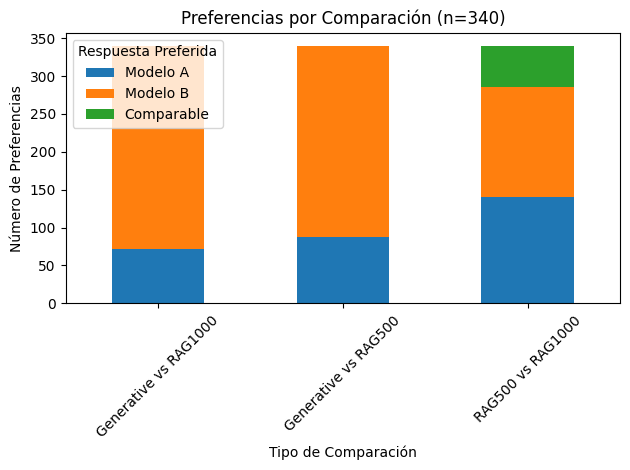

model                  Generative  RAG1000  RAG500
comparison_type                                   
Generative vs RAG1000       170.0    170.0     0.0
Generative vs RAG500        170.0      0.0   170.0
RAG500 vs RAG1000             0.0    170.0   170.0


In [26]:
import matplotlib.pyplot as plt

# Contar cuántas veces se prefiere cada respuesta en cada tipo de comparación
# Dividir entre 2 para corregir la duplicación
preference_counts = df_long.groupby(['comparison_type', 'preferred_answer']).size().unstack(fill_value=0) / 2

# Imprimir las frecuencias de las preferencias por comparación
print(preference_counts)

# Crear el histograma de las comparaciones (por tipo de comparación)
plt.figure(figsize=(10, 6))
preference_counts.plot(kind='bar', stacked=True)
plt.title('Preferencias por Comparación (n=340)')
plt.xlabel('Tipo de Comparación')
plt.ylabel('Número de Preferencias')
plt.xticks(rotation=45)
plt.legend(title='Respuesta Preferida', loc='upper left', labels=['Modelo A', 'Modelo B', 'Comparable'])
plt.tight_layout()
plt.show()

# Contar cuántas veces ha sido preferido cada modelo
# Dividir entre 2 para corregir la duplicación
model_preference_counts = df_long.groupby(['comparison_type', 'model']).size().unstack(fill_value=0) / 2

# Imprimir cuántas veces se ha preferido cada modelo
print(model_preference_counts)

In [27]:
from scipy.stats import binomtest
import pandas as pd

# Obtener los tipos de comparación únicos
comparison_types = df_long['comparison_type'].unique()

# Lista para almacenar resultados
binomial_results = []

# Iterar sobre cada tipo de comparación
for comp_type in comparison_types:
    # Filtrar solo A vs B para esta comparación
    ab_only = df_long[
        (df_long['comparison_type'] == comp_type) &
        (df_long['preferred_answer'].isin(['A', 'B']))
    ]

    # Contar número de veces que se prefirió A
    count_A = (ab_only['preferred_answer'] == 'A').sum() // 2
    n = len(ab_only) // 2

    # Realizar test binomial solo si hay datos suficientes
    if n > 0:
        test = binomtest(count_A, n=n, p=0.5)
        binomial_results.append({
            'Comparación': comp_type,
            'Preferencias A': count_A,
            'Preferencias B': n - count_A,
            'Total (A+B)': n,
            'p-valor': test.pvalue
        })

# Crear DataFrame con los resultados
binomial_df = pd.DataFrame(binomial_results)
print(binomial_df)
# Guardar en CSV con codificación UTF-8
binomial_df["p-valor"] = binomial_df["p-valor"].apply(lambda x: f"{x:.4e}")

# Crear el directorio si no existe
output_folder = "results"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)

# Exportar a CSV
csv_path = os.path.join(output_folder, "binomial_340.csv")
binomial_df.to_csv(csv_path, index=False)

# Exportar a XLSX
xlsx_path = os.path.join(output_folder, "binomial_340.xlsx")
binomial_df.to_excel(xlsx_path, index=False)


             Comparación  Preferencias A  Preferencias B  Total (A+B)  \
0   Generative vs RAG500              87             252          339   
1  Generative vs RAG1000              72             267          339   
2      RAG500 vs RAG1000             141             144          285   

        p-valor  
0  9.435733e-20  
1  1.743976e-27  
2  9.057226e-01  


### Comparación de las métricas. Wilcoxon test

In [28]:
# USO
folder_path = "C:/Users/Daniel/docs/comparisons_gemini20"
data = load_all_comparisons(folder_path)
comparisons = prepare_comparisons(data)
wilcoxon_results_df = run_wilcoxon_tests(comparisons)

# Mostrar los resultados significativos (p < 0.05)

print(wilcoxon_results_df[wilcoxon_results_df["p_valor"] < 0.05])
print(wilcoxon_results_df)

# Crear el directorio si no existe
output_folder = "results"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)

# Exportar a CSV
csv_path = os.path.join(output_folder, "wilcoxon_test_340.csv")
wilcoxon_results_df.to_csv(csv_path, index=False)

# Exportar a XLSX
xlsx_path = os.path.join(output_folder, "wilcoxon_test_340.xlsx")
wilcoxon_results_df.to_excel(xlsx_path, index=False)

print(f"Resultados guardados en:\n{csv_path}\n{xlsx_path}")

              comparación               métrica  wilcoxon_stat       p_valor  \
1    Generative vs RAG500              accuracy        10190.0  1.180425e-07   
2    Generative vs RAG500  completeness_overall        14489.0  9.044803e-08   
3    Generative vs RAG500           conciseness        15244.5  7.200272e-03   
5   Generative vs RAG1000              accuracy        10278.5  3.532545e-09   
6   Generative vs RAG1000  completeness_overall        11939.0  5.844031e-14   
7   Generative vs RAG1000           conciseness        14649.5  1.192379e-04   
8       RAG500 vs RAG1000          faithfulness         2289.0  1.300445e-07   
9       RAG500 vs RAG1000             relevance          723.5  1.348609e-03   
10      RAG500 vs RAG1000              accuracy         2586.0  1.145941e-03   
11      RAG500 vs RAG1000    completeness_given         2246.0  1.241752e-09   
12      RAG500 vs RAG1000  completeness_overall         3537.0  1.295453e-05   
13      RAG500 vs RAG1000           conc